In [1]:
!pip install imblearn

# Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
stroke = pd.read_csv(r"C:\Users\lenovo\Downloads\healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [4]:
stroke.shape

(5110, 12)

In [5]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
for col in stroke.columns:
    if is_numeric_dtype(stroke[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % stroke[col].mean())
        print('\t Standard deviation = %.2f' % stroke[col].std())
        print('\t Minimum = %.2f' % stroke[col].min())
        print('\t Maximum = %.2f' % stroke[col].max())
    if is_object_dtype(stroke[col]):
        print(stroke[col].value_counts())

id:
	 Mean = 36517.83
	 Standard deviation = 21161.72
	 Minimum = 67.00
	 Maximum = 72940.00
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
age:
	 Mean = 43.23
	 Standard deviation = 22.61
	 Minimum = 0.08
	 Maximum = 82.00
hypertension:
	 Mean = 0.10
	 Standard deviation = 0.30
	 Minimum = 0.00
	 Maximum = 1.00
heart_disease:
	 Mean = 0.05
	 Standard deviation = 0.23
	 Minimum = 0.00
	 Maximum = 1.00
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
avg_glucose_level:
	 Mean = 106.15
	 Standard deviation = 45.28
	 Minimum = 55.12
	 Maximum = 271.74
bmi:
	 Mean = 28.89
	 Standard deviation = 7.85
	 Minimum = 10.30
	 Maximum = 97.60
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes        

In [9]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Checking the null values if any

In [10]:

stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Filling the null values with mean
stroke['bmi'].fillna(round(stroke['bmi'].mean(),0),inplace = True)

In [12]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
stroke['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

From this data we can see that out of 5110 data only 249 people actually had stroke. This shows an imbalance in the dataset.


## Visualizing the data using count plot to get insights about various categorical features.

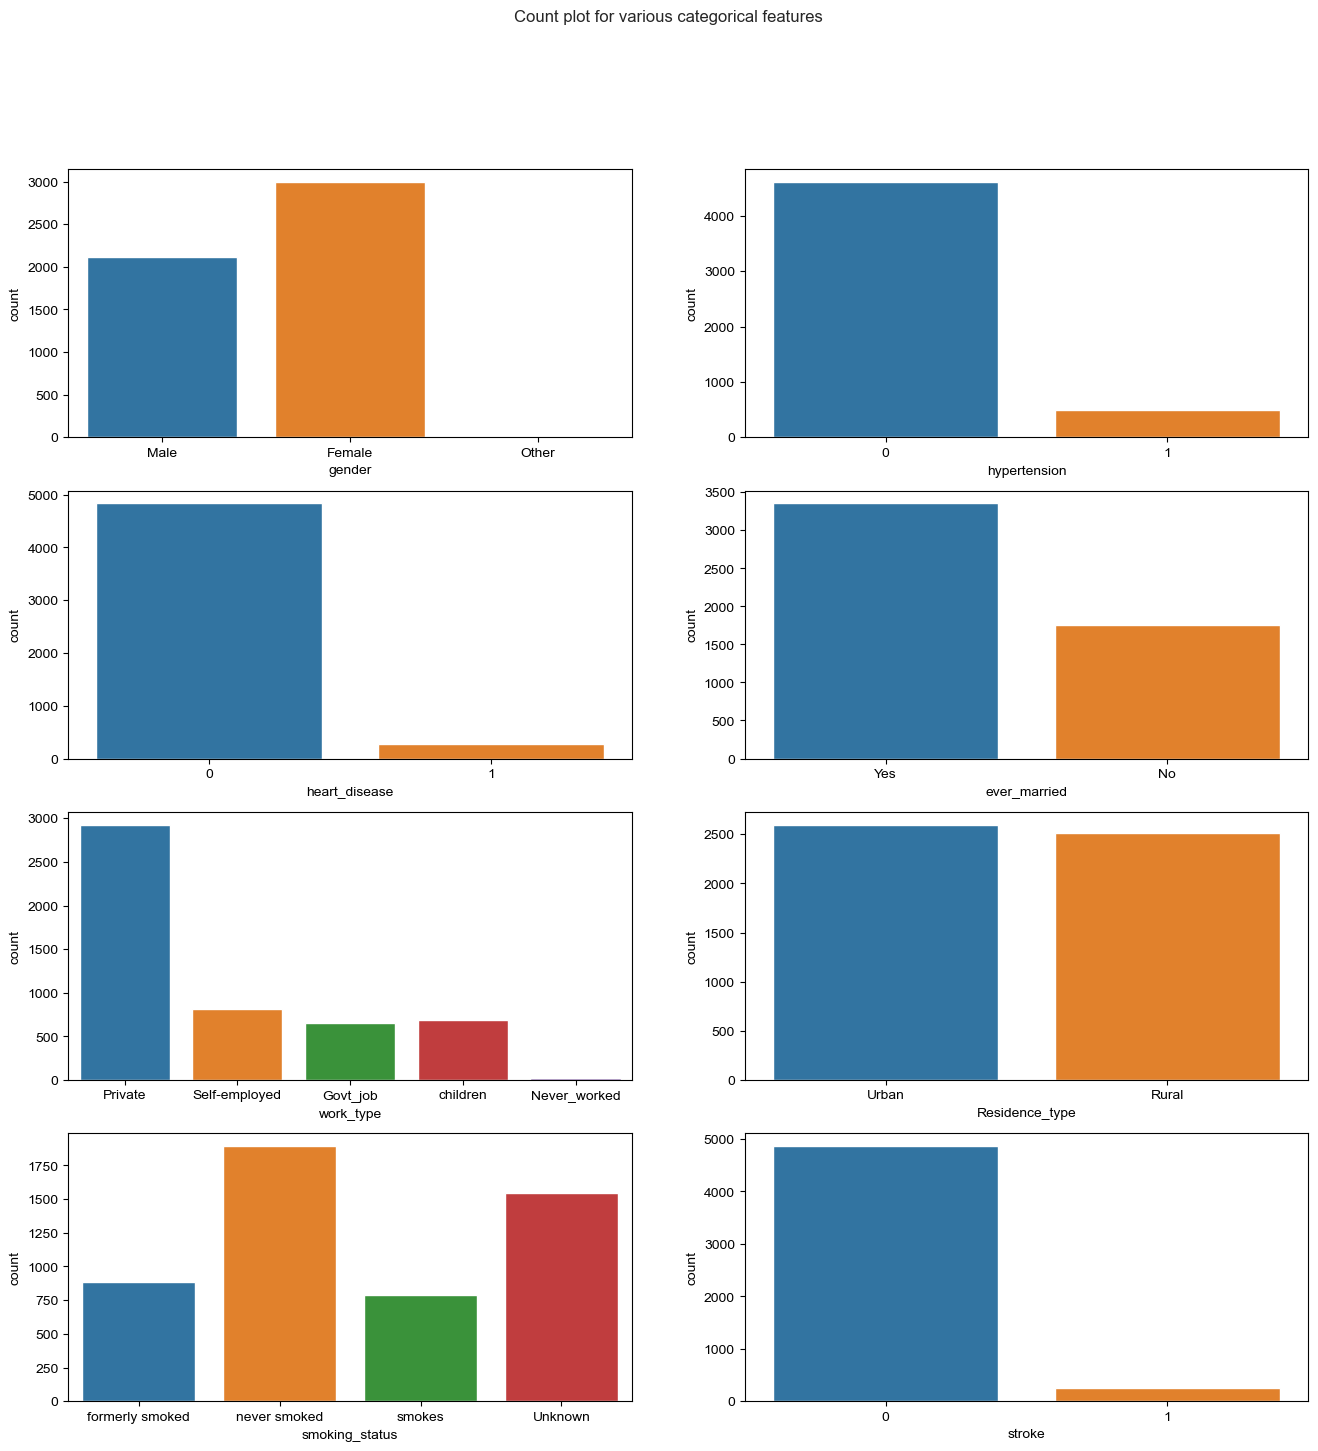

In [14]:
# Visualizing the data using count plot to get insights about various categorical features.
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=stroke,x='gender')
sns.countplot(ax=axes[0,1],data=stroke,x='hypertension')
sns.countplot(ax=axes[1,0],data=stroke,x='heart_disease')
sns.countplot(ax=axes[1,1],data=stroke,x='ever_married')
sns.countplot(ax=axes[2,0],data=stroke,x='work_type')
sns.countplot(ax=axes[2,1],data=stroke,x='Residence_type')
sns.countplot(ax=axes[3,0],data=stroke,x='smoking_status')
sns.countplot(ax=axes[3,1],data=stroke,x='stroke')

plt.show()

The data is higly imbalanced. The number of people have heart stroke is actually very less as compared to the ones not having it.So, while training data, either over sampling or under sampling has to be done to obtain best results.

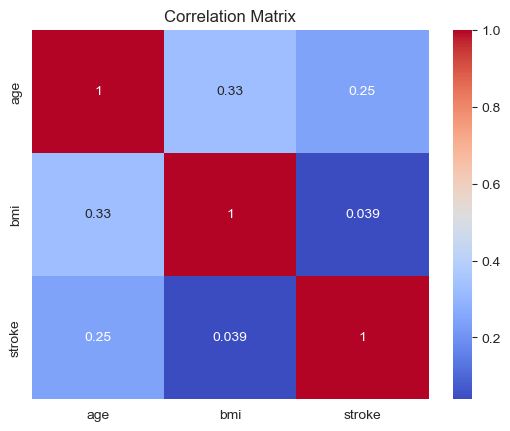

In [15]:
# Create a correlation matrix between age, BMI, and stroke status
corr = stroke[['age', 'bmi', 'stroke']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

# Checking for outliers

In [16]:
def col_names(stroke):
    # Check if each column is numeric
    is_numeric = np.vectorize(lambda x: np.issubdtype(x, np.number))(stroke.dtypes)
    
    # Select numerical columns
    num_cols = stroke.columns[is_numeric].tolist()
    
    # Select categorical columns
    cat_cols = stroke.columns[~is_numeric].tolist()
    
    # Select numerical but categorical columns
    num_but_cat = [col for col in num_cols if stroke[col].nunique() < 12]
    cat_cols = num_but_cat + cat_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    # Select categorical but cardinal columns
    cat_but_car = [col for col in cat_cols if stroke[col].nunique() > 12]
    
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat} \nCategorical but Cardinal: {cat_but_car}") 
    return num_cols, cat_cols

In [17]:
num_cols, cat_cols = col_names(stroke)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke'] 
Categorical but Cardinal: []


# Checking for columns with numerical variables

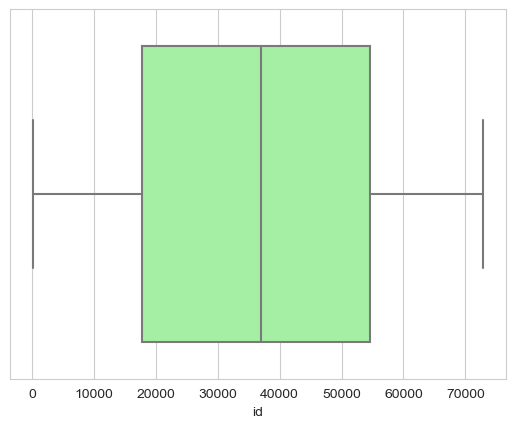

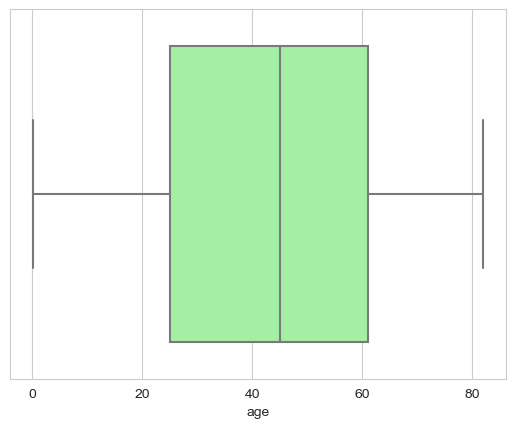

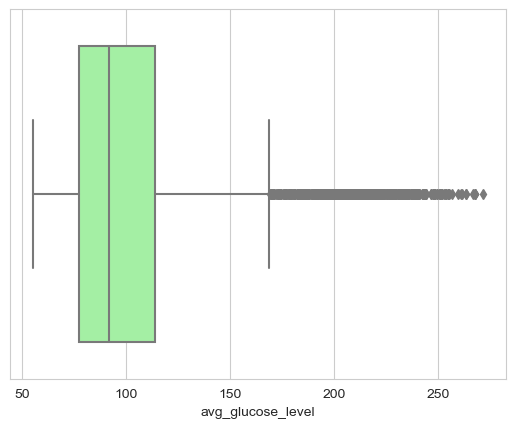

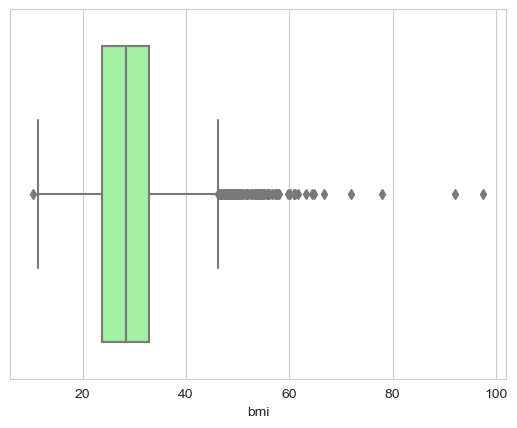

In [18]:
#To check for outliers we used boxplot:-
for col in num_cols:
    sns.boxplot(x=stroke[col], data=stroke, color="palegreen")
    plt.show(block=True)

In [19]:
def check_outliers(stroke, numerical_cols, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = stroke[col].quantile(low_threshold)
        q3 = stroke[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + 1.5 * interquantile
        low_limit = q1 - 1.5 * interquantile
        if stroke[(stroke[col] > up_limit) | (stroke[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [20]:
outlier_cols = check_outliers(stroke, num_cols)
print(outlier_cols)

['bmi']


#### BMI is showing a good amount of outliers

# Checking for numerical variables that impact the target variable stroke

In [21]:
for col in num_cols:
    print(stroke.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.828924
1       30.234940



#### With respect to numerical variables from this we can get an idea that "Age", "Avg_glucose_level" and "BMI" shows positive impact on stroke

# Impact of Categorical Variables on target variable stroke

In [22]:
for col in cat_cols:
    print(pd.DataFrame({"target_mean": stroke.groupby(col)["stroke"].mean()}), end="\n\n")

              target_mean
hypertension             
0                0.039679
1                0.132530

               target_mean
heart_disease             
0                 0.041787
1                 0.170290

        target_mean
stroke             
0               0.0
1               1.0

        target_mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000

              target_mean
ever_married             
No               0.016505
Yes              0.065613

               target_mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911

                target_mean
Residence_type             
Rural              0.045346
Urban              0.052003

                 target_mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232



#### With respect to categorical variables from this we can get an idea that "Hypertension" and "Heart Disease" shows positive impact on stroke

# Data Preprocessing

In [23]:
new_df = stroke

In [24]:
colname=[]

for x in new_df.columns:
    if new_df[x].dtypes=='object':
        colname.append(x)
        
colname

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    new_df[x]= le.fit_transform(new_df[x])

In [26]:
new_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


<AxesSubplot:>

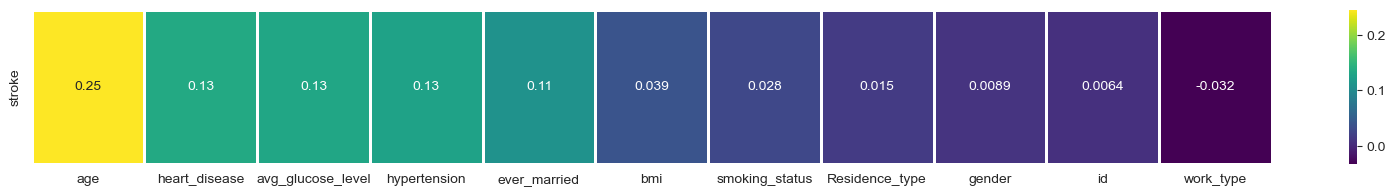

In [27]:
plt.figure(figsize=(20,2))
sns.heatmap(new_df.corr()[['stroke']].sort_values('stroke', ascending = False).iloc[1:].T,annot=True,cmap="viridis",linewidths=2)

In [28]:
def replace_with_thresholds(new_df, col, low_threshold=0.1, up_threshold=0.9):
    q1 = new_df[col].quantile(low_threshold)
    q3 = new_df[col].quantile(up_threshold)
    interquantile = q3 - q1
    up_limit = q3 + 1.5 * interquantile
    low_limit = q1 - 1.5 * interquantile
    new_df.loc[(new_df[col] < low_limit), col] = low_limit
    new_df.loc[(new_df[col] > up_limit), col] = up_limit

In [29]:
for col in outlier_cols:
    replace_with_thresholds(new_df, col)

In [30]:
check_outliers(new_df, num_cols)

There is no outliers


[]

As we have done all the Exploratory data analysis and we have seen during value counts that the data is imbalanced. So , it is important to balance the data so that it doesn't affect our further analysis.
To deal with the Imbalanced dataset we need to upsample the data using SMOTE Technique.

# Upsampling the dataset using SMOTE technique

In [31]:
new_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [32]:
# Split the data into training and testing sets
from sklearn.metrics import accuracy_score, f1_score
x = new_df.values[:,0:-1]
y = new_df.values[:,-1]
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('stroke', axis=1), new_df['stroke'], test_size=0.2)

# Apply SMOTE to the training data only
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Train a random forest classifier on the balanced training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print('classification_report: ',)
print(classification_report(y_test,y_pred))


Accuracy: 0.8933463796477495
[[901  68]
 [ 41  12]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       969
           1       0.15      0.23      0.18        53

    accuracy                           0.89      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.91      0.89      0.90      1022



In [33]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier on the balanced training data
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print('classification_report: ',)
print(classification_report(y_test,y_pred))


Logistic Regression Accuracy: 0.7270058708414873
[[709 260]
 [ 19  34]]
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       969
           1       0.12      0.64      0.20        53

    accuracy                           0.73      1022
   macro avg       0.54      0.69      0.52      1022
weighted avg       0.93      0.73      0.80      1022



In [34]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier on the balanced training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print('classification_report: ',)
print(classification_report(y_test,y_pred))




Decision Tree Accuracy: 0.8532289628180039
[[855 114]
 [ 36  17]]
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       969
           1       0.13      0.32      0.18        53

    accuracy                           0.85      1022
   macro avg       0.54      0.60      0.55      1022
weighted avg       0.92      0.85      0.88      1022



In [35]:
from sklearn.svm import SVC

# Train an SVM classifier on the balanced training data
svm = SVC(random_state=42)
svm.fit(x_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', accuracy)


from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print('classification_report: ',)
print(classification_report(y_test,y_pred))


SVM Accuracy: 0.6888454011741683
[[687 282]
 [ 36  17]]
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       969
           1       0.06      0.32      0.10        53

    accuracy                           0.69      1022
   macro avg       0.50      0.51      0.45      1022
weighted avg       0.90      0.69      0.77      1022



# Hyperparameter Tuning:

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9367943593325112


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to test
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# Create a logistic regression classifier
lr = LogisticRegression(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8175751601937019


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to test
param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8901597066403818


Even if we got good accuracy with a simple classification model, it is still worth considering hyperparameter tuning to potentially improve the model's performance further.Our findings suggest that Random Forest is the most efficient algorithm for predicting heart stroke, with an accuracy score of 89% and F1 score of 94%. After applying hyperparameter tuning the accuracy of Random forest increased to 93% which shows that by tuning the hyperparameters, we potentially improved the accuracy of the model, reduced overfitting, and increased the model's ability to generalize to new data. 

# CONCLUSION:-

Cardiovascular disease is a leading cause of mortality rate worldwide. To address this problem it is very much important to develop an effective and efficient Machine learning algorithm. We  used four diffent algorithms i.e. Decision Tree, Random Forest, Logistic Regression and Support Vector Machine.
Our findings suggest that Random Forest is the most efficient algorithm for predicting heart stroke, with an accuracy score of 88%. This information could be utilized to develop an application based on the Random Forest algorithm to assist healthcare professionals in predicting heart stroke more accurately.